## all imported packages used 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics as sm
import statsmodels.formula.api as smf

## Reading csvfile

In [2]:
df=pd.read_csv("instagram.csv")

## prints first five rows

In [3]:
df.head()

,Unnamed: 0,S.No,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes
0,0,1,mikequindazzi,Who are #DataScientist and what do they do? >>...,1600,#MachineLearning #AI #DataAnalytics #DataScien...,11 hours,139
1,1,2,drgorillapaints,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,2 hours,23
2,2,3,aitrading_official,Alexander Barinov: 4 years as CFO in multinati...,255,#whoiswho #aitrading #ai #aitradingteam#instat...,2 hours,25
3,3,4,opensourcedworkplace,sfad,340,#iot #cre#workplace #CDO #bigdata #technology#...,3 hours,49
4,4,5,crea.vision,Ever missed a call while your phone was chargi...,304,#instamachinelearning #instabigdata#instamarke...,3 hours,30


## converting column into int type 

In [4]:
df["Time since posted"]= df["Time since posted"].str.replace(" hours", " ", case = False)

## after conversiom dataset displays as follows

In [5]:
df.head()

,Unnamed: 0,S.No,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes
0,0,1,mikequindazzi,Who are #DataScientist and what do they do? >>...,1600,#MachineLearning #AI #DataAnalytics #DataScien...,11,139
1,1,2,drgorillapaints,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,2,23
2,2,3,aitrading_official,Alexander Barinov: 4 years as CFO in multinati...,255,#whoiswho #aitrading #ai #aitradingteam#instat...,2,25
3,3,4,opensourcedworkplace,sfad,340,#iot #cre#workplace #CDO #bigdata #technology#...,3,49
4,4,5,crea.vision,Ever missed a call while your phone was chargi...,304,#instamachinelearning #instabigdata#instamarke...,3,30


## display datatypes of all columns

In [6]:
df.dtypes

Unnamed: 0            int64
S.No                  int64
USERNAME             object
Caption              object
Followers             int64
Hashtags             object
Time since posted    object
Likes                 int64
dtype: object

In [7]:
df.dtypes

Unnamed: 0            int64
S.No                  int64
USERNAME             object
Caption              object
Followers             int64
Hashtags             object
Time since posted    object
Likes                 int64
dtype: object

## converting object type to int

In [8]:
df["Time since posted"]=df["Time since posted"].astype(int)

## joint plot beween followers and likes

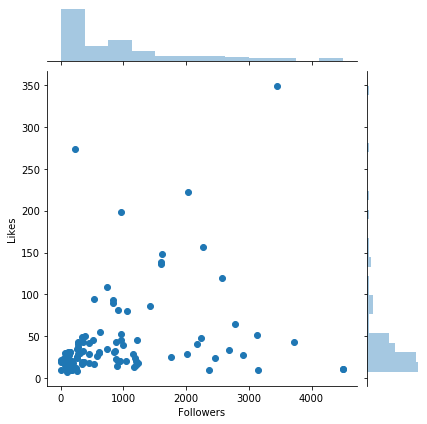

In [9]:
k= sns.jointplot(x="Followers",y="Likes", data=df)

## joint plot of time since posted and likes

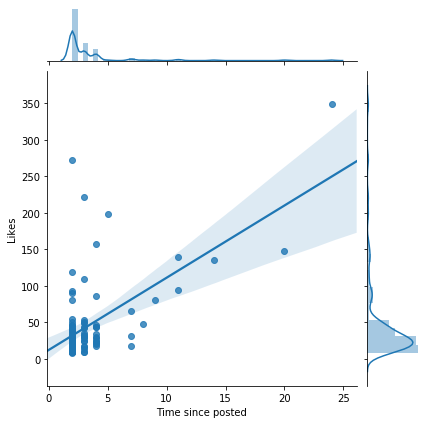

In [10]:
g= sns.jointplot(x="Time since posted",y="Likes", data=df,kind='reg')

## removing unwanted columns

In [11]:
drop=["Unnamed: 0","S.No","USERNAME","Caption","Hashtags"]

In [12]:
df.drop(drop,inplace=True,axis=1)

In [13]:
df.head()

,Followers,Time since posted,Likes
0,1600,11,139
1,880,2,23
2,255,2,25
3,340,3,49
4,304,3,30


## declaring x (ie independent variable)

In [14]:
x=df.iloc[:,0:2]

In [15]:
x.head()

,Followers,Time since posted
0,1600,11
1,880,2
2,255,2
3,340,3
4,304,3


## declaring y the target or dependent variable

In [16]:
y=df.iloc[:,2]

In [17]:
y.head()

0    139
1     23
2     25
3     49
4     30
Name: Likes, dtype: int64

## importing the function train_test_split

In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=999)

In [19]:
x_train

,Followers,Time since posted
7,1433,4
40,258,2
33,610,2
15,971,3
46,1180,2
...,...,...
91,971,2
72,955,2
97,182,3
92,106,2


In [20]:
len(x_train)

80

In [21]:
len(x_test)

20

## importing linearregression

In [22]:
from sklearn.linear_model import LinearRegression
clf=LinearRegression()

In [23]:
clf.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [24]:
y_predict=clf.predict(x_test)

In [25]:
y_predict

array([124.48749812,  30.25997782,  29.7290413 ,  32.9377446 ,
        63.01212305,  29.64824661,  32.38949493, 153.5324651 ,
        33.41674167,  47.91505861,  77.38708323,  31.17757462,
        29.23273108,  29.16347849,  28.82298659,  40.67095039,
        29.59053612,  30.77360119,  49.09235262,  38.32573973])

## accuracy

In [26]:
clf.score(x_test,y_test)

0.6497302598488491

In [27]:
from sklearn.metrics import mean_squared_error

## mean square error

In [28]:
mean_squared_error(y_test,y_predict)

455.85767764536496

## r2 value

In [29]:
from sklearn.metrics import r2_score
r2_score(y_test,y_predict)

0.649730259848849